In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import sklearn.neighbors
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import pickle

<Axes: xlabel='x', ylabel='y'>

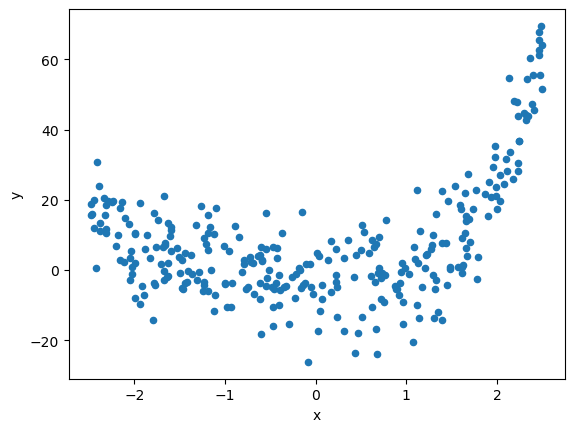

In [4]:
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')

In [5]:
list_to_df = []
list_of_tuples = []

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(240,) (240,)
(60,) (60,)


In [7]:
tmp_list = []
lin_reg = LinearRegression()
lin_reg.fit(X_train.reshape(-1, 1), y_train)
print(lin_reg.intercept_, lin_reg.coef_, "\n")
y_train_pred = [lin_reg.intercept_ * element + lin_reg.coef_ for element in X_train]
y_test_pred = [lin_reg.intercept_ * element + lin_reg.coef_ for element in X_test]
lin_reg_train_mse = mean_squared_error(y_train, y_train_pred)
lin_reg_test_mse = mean_squared_error(y_test, y_test_pred)
tmp_list.append(lin_reg_train_mse)
tmp_list.append(lin_reg_test_mse)
list_to_df.append(tmp_list)
print(tmp_list)
print(list_to_df)

7.7818273809771 [4.55250638] 

[269.9846286080621, 326.1706639760026]
[[269.9846286080621, 326.1706639760026]]


In [8]:
list_of_tuples.append((lin_reg, None))

In [9]:
knn_reg_3 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn_reg_3.fit(X_train.reshape(-1, 1), y_train)
y_knn3_train_pred = knn_reg_3.predict(X_train.reshape(-1, 1))
y_knn3_test_pred = knn_reg_3.predict(X_test.reshape(-1, 1))
knn_3_train_mse = mean_squared_error(y_train, y_knn3_train_pred)
knn_3_test_mse = mean_squared_error(y_test, y_knn3_test_pred)
tmp_list = []
tmp_list.append(knn_3_train_mse)
tmp_list.append(knn_3_test_mse)
list_to_df.append(tmp_list)

In [10]:
list_of_tuples.append((knn_reg_3, None))

In [11]:
knn_reg_5 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
knn_reg_5.fit(X_train.reshape(-1, 1), y_train)
y_knn5_train_pred = knn_reg_5.predict(X_train.reshape(-1, 1))
y_knn5_test_pred = knn_reg_5.predict(X_test.reshape(-1, 1))
knn_5_train_mse = mean_squared_error(y_train, y_knn5_train_pred)
knn_5_test_mse = mean_squared_error(y_test, y_knn5_test_pred)
tmp_list = []
tmp_list.append(knn_5_train_mse)
tmp_list.append(knn_5_test_mse)
list_to_df.append(tmp_list)

In [12]:
list_of_tuples.append((knn_reg_5, None))

In [13]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train.reshape(-1, 1))
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
print(lin_reg.intercept_, lin_reg.coef_)
y_poly2_train_pred = lin_reg.predict(poly_features.fit_transform(X_train.reshape(-1, 1)))
y_poly2_test_pred = lin_reg.predict(poly_features.fit_transform(X_test.reshape(-1, 1)))
y_poly2_train_mse = mean_squared_error(y_train, y_poly2_train_pred)
y_poly2_test_mse = mean_squared_error(y_test, y_poly2_test_pred)
tmp_list = []
tmp_list.append(y_poly2_train_mse)
tmp_list.append(y_poly2_test_mse)
list_to_df.append(tmp_list)

-5.8697976816405735 [4.28156683 6.17591408]


In [14]:
list_of_tuples.append((lin_reg, poly_features))

In [15]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X_train.reshape(-1, 1))
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
print(lin_reg.intercept_, lin_reg.coef_)
y_poly3_train_pred = lin_reg.predict(poly_features.fit_transform(X_train.reshape(-1, 1)))
y_poly3_test_pred = lin_reg.predict(poly_features.fit_transform(X_test.reshape(-1, 1)))
y_poly3_train_mse = mean_squared_error(y_train, y_poly3_train_pred)
y_poly3_test_mse = mean_squared_error(y_test, y_poly3_test_pred)
tmp_list = []
tmp_list.append(y_poly3_train_mse)
tmp_list.append(y_poly3_test_mse)
list_to_df.append(tmp_list)

-5.818947328727294 [-3.02873773  6.08646284  1.91751386]


In [16]:
list_of_tuples.append((lin_reg, poly_features))

In [17]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X_train.reshape(-1, 1))
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
print(lin_reg.intercept_, lin_reg.coef_)
y_poly4_train_pred = lin_reg.predict(poly_features.fit_transform(X_train.reshape(-1, 1)))
y_poly4_test_pred = lin_reg.predict(poly_features.fit_transform(X_test.reshape(-1, 1)))
y_poly4_train_mse = mean_squared_error(y_train, y_poly4_train_pred)
y_poly4_test_mse = mean_squared_error(y_test, y_poly4_test_pred)
tmp_list = []
tmp_list.append(y_poly4_train_mse)
tmp_list.append(y_poly4_test_mse)
list_to_df.append(tmp_list)

-1.8628901759978298 [-2.63957107  0.24490378  1.79382548  1.06348843]


In [18]:
list_of_tuples.append((lin_reg, poly_features))

In [19]:
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X_train.reshape(-1, 1))
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
print(lin_reg.intercept_, lin_reg.coef_)
y_poly5_train_pred = lin_reg.predict(poly_features.fit_transform(X_train.reshape(-1, 1)))
y_poly5_test_pred = lin_reg.predict(poly_features.fit_transform(X_test.reshape(-1, 1)))
y_poly5_train_mse = mean_squared_error(y_train, y_poly5_train_pred)
y_poly5_test_mse = mean_squared_error(y_test, y_poly5_test_pred)
tmp_list = []
tmp_list.append(y_poly5_train_mse)
tmp_list.append(y_poly5_test_mse)
list_to_df.append(tmp_list)

-1.8639995113890304 [-2.67803232  0.24506501  1.82157368  1.06360023 -0.00390799]


In [20]:
list_of_tuples.append((lin_reg, poly_features))

In [21]:
for element in list_to_df:
    print(element)

[269.9846286080621, 326.1706639760026]
[50.141503898061536, 127.9364530675772]
[57.631053902008716, 113.96555340432684]
[101.66895489616236, 112.69555053088243]
[79.74214957384952, 80.0676856146715]
[68.96847105965996, 77.83544834168627]
[68.96823916395472, 77.82670659775934]


In [22]:
df = pd.DataFrame(list_to_df, columns=['train_mse', 'test_mse'])
df.index = ['lin_reg', 'knn_3_reg', 'knn_5_reg', 'poly_2_reg', 'poly_3_reg', 'poly_4_reg', 'poly_5_reg']
         


In [23]:
print(df)

             train_mse    test_mse
lin_reg     269.984629  326.170664
knn_3_reg    50.141504  127.936453
knn_5_reg    57.631054  113.965553
poly_2_reg  101.668955  112.695551
poly_3_reg   79.742150   80.067686
poly_4_reg   68.968471   77.835448
poly_5_reg   68.968239   77.826707


In [24]:
df.to_pickle('mse.pkl')

In [25]:
for element in list_of_tuples:
    print(element)

(LinearRegression(), None)
(KNeighborsRegressor(n_neighbors=3), None)
(KNeighborsRegressor(), None)
(LinearRegression(), PolynomialFeatures(include_bias=False))
(LinearRegression(), PolynomialFeatures(degree=3, include_bias=False))
(LinearRegression(), PolynomialFeatures(degree=4, include_bias=False))
(LinearRegression(), PolynomialFeatures(degree=5, include_bias=False))


In [26]:
with open ('reg.pkl', 'wb') as file:
    pickle.dump(list_of_tuples, file)